#Stock Market Analysis & Prediction

Problem Statement - Time Series forecasting & modelling plays an important role in data analysis. Stock prices are volatile in nature and price depends on various factors. The main aim of this project is to predict the closing price of stocks in the near future. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import datetime
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import glob as g
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Collection

In [3]:
path="/content/drive/MyDrive/Project"
all_files=g.glob(os.path.join(path,"*.csv"))
print(os.getcwd())

/content


In [4]:
#Merge data from multiple files (each stock data is on separate file)
df_from_each_file = (pd.read_csv(f, sep=',')for f in all_files)
df_merged=pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv ("combined_stockdata_1.csv")

In [5]:
df_merged.head(2)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,AMARAJABAT,01-07-2002,5.763333,5.833333,5.696666,5.72,4.567834,838110.0
1,AMARAJABAT,02-07-2002,5.766666,5.820000,5.746666,5.79,4.623735,688305.0


In [6]:
df_merged.shape

(122361, 8)

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122361 entries, 0 to 122360
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Symbol     122361 non-null  object 
 1   Date       122361 non-null  object 
 2   Open       122156 non-null  float64
 3   High       122156 non-null  float64
 4   Low        122156 non-null  float64
 5   Close      122156 non-null  float64
 6   Adj Close  122156 non-null  float64
 7   Volume     122156 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.5+ MB


In [8]:
company_list=df_merged.Symbol.unique()
company_list

array(['AMARAJABAT', 'APOLLOTYRE', 'BAJAJFINSV', 'BERGEPAINT',
       'COALINDIA', 'COLPAL', 'DABUR', 'DRREDDY', 'FINPIPE', 'HDFCBANK',
       'HINDPETRO', 'INFY', 'KOTAKBANK', 'M&M', 'MARUTI', 'MINDTREE',
       'RELIANCE', 'SAIL', 'TATASTEEL', 'TCS', 'TITAN', 'ULTRACEMCO',
       'VOLTAS', 'WIPRO', 'SUNPHARMA'], dtype=object)

##Data Preprocessing

###Format date column

In [9]:
df_merged['Date']=pd.to_datetime(df_merged['Date'],dayfirst=True)

In [10]:
df_merged.head(3)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,AMARAJABAT,2002-07-01,5.763333,5.833333,5.696666,5.720000,4.567834,838110.0
1,AMARAJABAT,2002-07-02,5.766666,5.820000,5.746666,5.790000,4.623735,688305.0
2,AMARAJABAT,2002-07-03,5.793333,6.113333,5.793333,5.926666,4.732872,1731270.0


In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122361 entries, 0 to 122360
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Symbol     122361 non-null  object        
 1   Date       122361 non-null  datetime64[ns]
 2   Open       122156 non-null  float64       
 3   High       122156 non-null  float64       
 4   Low        122156 non-null  float64       
 5   Close      122156 non-null  float64       
 6   Adj Close  122156 non-null  float64       
 7   Volume     122156 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.5+ MB


###Remove null values 

on holidays only

*   on saturdays and sundays
*   public holidays



In [12]:
#check for null values 
df_null=pd.isnull(df_merged)
c=pd.isnull(df_merged).sum()
c


Symbol         0
Date           0
Open         205
High         205
Low          205
Close        205
Adj Close    205
Volume       205
dtype: int64

In [13]:
#Add day column 
df_merged['Date'].dt.strftime('%d-%m-%y')
df_merged['Day']=df_merged['Date'].dt.day_name()

In [14]:
df_merged.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,AMARAJABAT,2002-07-01,5.763333,5.833333,5.696666,5.720000,4.567834,838110.0,Monday
1,AMARAJABAT,2002-07-02,5.766666,5.820000,5.746666,5.790000,4.623735,688305.0,Tuesday
2,AMARAJABAT,2002-07-03,5.793333,6.113333,5.793333,5.926666,4.732872,1731270.0,Wednesday
3,AMARAJABAT,2002-07-04,5.993333,5.996666,5.883333,5.893333,4.706254,472860.0,Thursday
4,AMARAJABAT,2002-07-05,6.026666,6.026666,5.886666,5.910000,4.719563,688410.0,Friday


In [15]:
#Remove rows with days Saturday and Sunday
df_merged.drop(df_merged.index[df_merged['Day']=='Saturday'],inplace=True)
df_merged.drop(df_merged.index[df_merged['Day']=='Sunday'],inplace=True)


In [16]:
c=pd.isnull(df_merged).sum()
c

Symbol        0
Date          0
Open         31
High         31
Low          31
Close        31
Adj Close    31
Volume       31
Day           0
dtype: int64

In [17]:
#NA on public holidays -- Remove rows where volume=0 (means no trading happens)
df_merged=df_merged[(df_merged['Volume']>0)]

In [18]:
c=pd.isnull(df_merged).sum()
c

Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
dtype: int64

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120837 entries, 0 to 122360
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Symbol     120837 non-null  object        
 1   Date       120837 non-null  datetime64[ns]
 2   Open       120837 non-null  float64       
 3   High       120837 non-null  float64       
 4   Low        120837 non-null  float64       
 5   Close      120837 non-null  float64       
 6   Adj Close  120837 non-null  float64       
 7   Volume     120837 non-null  float64       
 8   Day        120837 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 9.2+ MB


In [20]:
#Remove day column
df_merged.drop('Day',axis=1,inplace=True)

In [21]:
df_merged.columns


Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

##EDA

####Consider TCS Stocks

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df=df_merged.loc[(df_merged["Symbol"] == "TCS")]

In [ ]:
df.head(10)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
92200,TCS,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.410915,212976.0
92201,TCS,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.012718,153576.0
92202,TCS,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.012482,822776.0
92204,TCS,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.947678,811856.0
92205,TCS,2002-08-19,36.674999,36.674999,35.137501,35.474998,26.280922,205880.0
92206,TCS,2002-08-20,35.724998,38.724998,35.487499,36.462502,27.012482,3773624.0
92207,TCS,2002-08-21,38.474998,39.200001,36.525002,38.250000,28.336710,3011064.0
92208,TCS,2002-08-22,39.512501,41.575001,39.312500,39.900002,29.559090,6732480.0
92209,TCS,2002-08-23,40.250000,43.625000,39.762501,42.299999,31.337076,4841672.0
92210,TCS,2002-08-26,42.974998,43.250000,41.812500,42.150002,31.225956,2576912.0


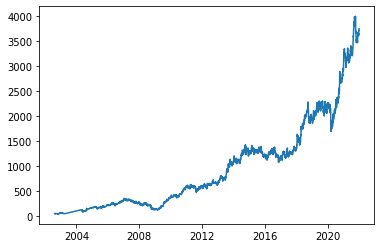

In [ ]:
plt.plot(df["Date"],df["High"])


Text(0.5, 1.0, 'Volume vs Date')

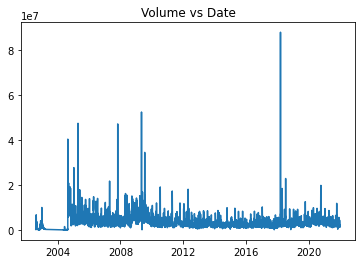

In [ ]:
plt.plot(df["Date"],df["Volume"])
plt.title("Volume vs Date")

###Adjacent close price plot 

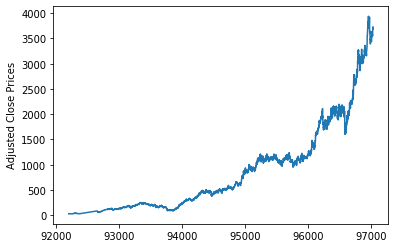

In [ ]:
df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

###Comparison of volume traded by each company from 2001-2021

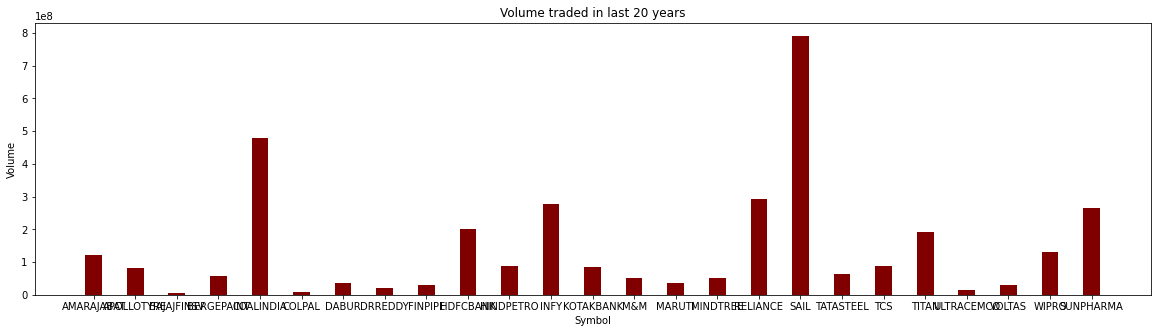

In [ ]:
plt.figure(figsize = (20, 5))
plt.bar(df_merged.Symbol, df_merged.Volume, color ='maroon',
        width = 0.4)
plt.xlabel("Symbol")
plt.ylabel("Volume")
plt.title("Volume traded in last 20 years")
plt.show()

##Model training and performance

In [22]:
import numpy as np
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error


In [23]:
company_list=df_merged.Symbol.unique()

In [24]:
company_list

array(['AMARAJABAT', 'APOLLOTYRE', 'BAJAJFINSV', 'BERGEPAINT',
       'COALINDIA', 'COLPAL', 'DABUR', 'DRREDDY', 'FINPIPE', 'HDFCBANK',
       'HINDPETRO', 'INFY', 'KOTAKBANK', 'M&M', 'MARUTI', 'MINDTREE',
       'RELIANCE', 'SAIL', 'TATASTEEL', 'TCS', 'TITAN', 'ULTRACEMCO',
       'VOLTAS', 'WIPRO', 'SUNPHARMA'], dtype=object)

###Random Forest Regression

In [ ]:
df=df_merged.loc[(df_merged["Symbol"] == "TCS")]
df.head(3)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
92200,TCS,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.410915,212976.0
92201,TCS,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.012718,153576.0
92202,TCS,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.012482,822776.0


In [ ]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 5.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=2f6060c6849f0dd84f56ccc1f1499252664dddabeca8ceb10757cc02d1c986fb
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta 


In [ ]:
#Install talib-binary library for adding technical indicators on data
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 5.2 MB/s 


In [ ]:
import talib as tb

In [ ]:
#Calculate moving average(MA) and relative strength index (RSI) for 14,30,50 and 200 days.
feature_names = []
for n in [14, 30, 50, 200]:
    df['ma' + str(n)] = tb.SMA(df['Adj Close'].values, timeperiod=n)
    df['rsi' + str(n)] = tb.RSI(df['Adj Close'].values, timeperiod=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [ ]:
#calculate volume percentage change.
df['Volume_1d_change'] = df['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [ ]:
#calculate 5 days close future prediction
df['5d_future_close'] = df['Adj Close'].shift(-5)
df['5d_close_future_pct'] = df['5d_future_close'].pct_change(5)

In [ ]:
df.tail(3)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Volume_1d_change,5d_future_close,5d_close_future_pct
97023,TCS,2021-12-28,3710.000000,3725.000000,3693.850098,3706.550049,3700.048340,1456218.0,3617.963989,64.320414,3566.842375,57.013557,3542.201675,55.368705,3382.169968,55.343667,-0.050789,NaN,0.007338
97024,TCS,2021-12-29,3692.250000,3719.949951,3685.000000,3694.699951,3688.218994,1456923.0,3624.591622,62.266441,3571.444287,56.247509,3543.151006,54.938237,3385.736805,55.236355,0.000484,NaN,0.010569
97025,TCS,2021-12-30,3681.350098,3740.000000,3680.000000,3733.750000,3727.200684,1966475.0,3631.504482,66.107367,3578.493571,58.163767,3545.139517,56.086261,3389.280901,55.521983,0.349745,NaN,0.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Train test split
df.dropna(inplace=True)

X = df[feature_names]
y = df['5d_close_future_pct']
scale=MinMaxScaler()
X=scale.fit_transform(X)
train_size = int(0.85 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [ ]:
X_train

array([[0.00000000e+00, 4.58113003e-01, 0.00000000e+00, ...,
        0.00000000e+00, 6.56495862e-01, 1.20995149e-03],
       [1.85777651e-05, 4.96928804e-01, 5.33121139e-05, ...,
        5.35239144e-05, 6.67026403e-01, 2.55269554e-03],
       [7.51892600e-05, 5.20647396e-01, 1.07530832e-04, ...,
        1.11203559e-04, 6.73535783e-01, 7.29852217e-03],
       ...,
       [5.24493970e-01, 4.65084648e-01, 5.12451099e-01, ...,
        5.51071002e-01, 5.65041013e-01, 2.80216739e-03],
       [5.23264443e-01, 3.90447439e-01, 5.13368768e-01, ...,
        5.51245417e-01, 5.38130525e-01, 4.86393349e-03],
       [5.22203054e-01, 3.97630485e-01, 5.14435338e-01, ...,
        5.51412778e-01, 5.40056825e-01, 3.21247883e-03]])

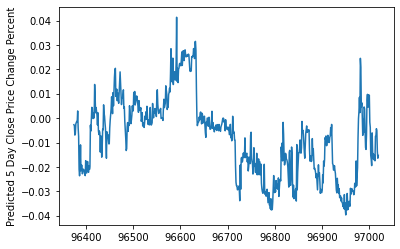

In [ ]:
#Model creation and evaluation
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred = pd.Series(y_pred, index=y_test.index)
y_pred.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("(R^2) Score:", round(r2_score(y_test, y_pred), 4))

Mean Absolute Error: 0.029750672083437117
Mean Squared Error: 0.00156960489044258
Root Mean Squared Error: 0.03961823936575905
(R^2) Score: -0.2383


In [ ]:
y_test

96374   -0.025939
96375   -0.022644
96376   -0.041419
96377   -0.017064
96378    0.012393
           ...   
97016    0.024147
97017    0.039135
97018    0.027229
97019    0.017613
97020    0.019398
Name: 5d_close_future_pct, Length: 645, dtype: float64

In [ ]:
y_pred

96374   -0.002542
96375   -0.002435
96376   -0.002433
96377   -0.003214
96378   -0.003418
           ...   
97016   -0.002606
97017   -0.002542
97018   -0.002743
97019   -0.003403
97020   -0.003669
Length: 645, dtype: float64

In [ ]:
#Percentage close price change for next 5 days for all companies using random forest regression
company_list=df_merged.Symbol.unique()
for company in company_list:
    df=df_merged.loc[(df_merged["Symbol"] == company)]
    #Add more features in data using ta_lib 
    feature_names = []
    for n in [14, 30, 50, 200]:
      df['ma' + str(n)] = tb.SMA(df['Adj Close'].values, timeperiod=n)
      df['rsi' + str(n)] = tb.RSI(df['Adj Close'].values, timeperiod=n)

      feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
      df['Volume_1d_change'] = df['Volume'].pct_change()

    volume_features = ['Volume_1d_change']
    feature_names.extend(volume_features)
    df['5d_future_close'] = df['Adj Close'].shift(-5)
    df['5d_close_future_pct'] = df['5d_future_close'].pct_change(5)
    df.dropna(inplace=True)

    #Independent Variables - ma,rsi,volume change etc. 
    #Dependent Variable - future 5 days close price change percentage
    X = df[feature_names]
    y = df['5d_close_future_pct']

    #Scale the independent variables
    scale=MinMaxScaler()
    X=scale.fit_transform(X)

    #Train test split
    train_size = int(0.85 * y.shape[0])
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]

    #Model creation and prediction
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    #Measure performance 
    print(company)
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print("(R^2) Score:", round(r2_score(y_test, y_pred), 4))
    print()

    


AMARAJABAT
Mean Absolute Error: 0.04357136592682486
Mean Squared Error: 0.003668642042294257
Root Mean Squared Error: 0.060569316013095745
(R^2) Score: -0.5611

APOLLOTYRE
Mean Absolute Error: 0.04609883852712773
Mean Squared Error: 0.004049772012403644
Root Mean Squared Error: 0.06363781904185313
(R^2) Score: -0.0857

BAJAJFINSV
Mean Absolute Error: 0.07095895176051051
Mean Squared Error: 0.008198126995697818
Root Mean Squared Error: 0.09054350885457123
(R^2) Score: -1.1948

BERGEPAINT
Mean Absolute Error: 0.05546258528934753
Mean Squared Error: 0.004376907036605199
Root Mean Squared Error: 0.0661581970477219
(R^2) Score: -1.3751

COALINDIA
Mean Absolute Error: 0.051690709970625526
Mean Squared Error: 0.004203530558400354
Root Mean Squared Error: 0.0648346401115974
(R^2) Score: -0.826

COLPAL
Mean Absolute Error: 0.02895449603811441
Mean Squared Error: 0.0014559116583368573
Root Mean Squared Error: 0.03815641044879428
(R^2) Score: -0.176

DABUR
Mean Absolute Error: 0.03143308849950902

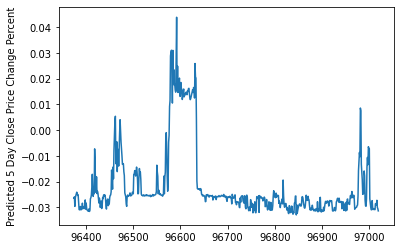

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=100, min_samples_split=50,min_samples_leaf= 5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred = pd.Series(y_pred, index=y_test.index)
y_pred.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [ ]:
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print("(R^2) Score:", round(r2_score(y_test, y_pred), 4))
    print()

Mean Absolute Error: 0.035770718695367694
Mean Squared Error: 0.0020723725165265575
Root Mean Squared Error: 0.045523318382193506
(R^2) Score: -0.635



###Linear Regression


In [ ]:
df=df_merged.loc[(df_merged["Symbol"] == "INFY")]

In [ ]:
df.drop('Symbol',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
52584,2001-01-01,89.140625,90.623436,86.875000,87.400002,60.825027,59981248.0
52585,2001-01-02,87.515625,89.531250,85.937500,88.763283,61.773792,68767872.0
52586,2001-01-03,87.500000,88.281250,85.682816,87.723434,61.050106,64125952.0
52587,2001-01-04,87.968750,96.718750,87.968750,95.333595,66.346321,71192960.0
52588,2001-01-05,95.296875,99.984375,94.656250,99.709373,69.391579,67941888.0
52589,2001-01-08,98.625000,99.140625,92.671875,93.510155,65.077316,76229504.0
52590,2001-01-09,92.750000,94.921875,91.190628,92.623436,64.460220,64873024.0
52591,2001-01-10,93.751564,94.198441,88.002342,88.532814,61.613392,91550336.0
52592,2001-01-11,88.671875,89.687500,86.296875,86.692970,60.332970,68442560.0
52593,2001-01-12,86.875000,91.406250,86.753906,90.635155,63.076504,92083584.0


In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [ ]:
df = df[['Adj Close']]

In [ ]:
pip install  pandas_ta

     |████████████████████████████████| 115 kB 20.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=685caf3950ff6015d0773957d6d5f9d3a6f6e44131e2e5845b8b42063000f141
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta
# Add EMA to dataframe
df.ta.ema(close='Adj Close', length=10, append=True)

/usr/local/lib/python3.7/dist-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


52584            NaN
52585            NaN
52586            NaN
52587            NaN
52588            NaN
            ...     
57825    1809.342140
57826    1819.670846
57827    1832.094329
57828    1841.813551
57829    1851.092901
Name: EMA_10, Length: 5187, dtype: float64

In [ ]:
df = df.iloc[10:]
print(df.head(10))

            Date        Open        High         Low       Close  Adj Close  \
52594 2001-01-15   91.015625   97.103905   90.937500   96.396095  67.085739   
52595 2001-01-16   96.717186   97.484375   94.314064   95.284378  66.312080   
52596 2001-01-17   99.218750   99.359375   97.034378   98.403908  68.483086   
52597 2001-01-18   98.828125  101.328125   98.828125  100.473434  69.923332   
52598 2001-01-19  100.750000  106.166405  100.750000  105.467972  73.399208   
52599 2001-01-22  106.171875  108.203125  105.500000  106.821877  74.341461   
52600 2001-01-23  105.953903  106.404686  104.376564  105.563278  73.465546   
52601 2001-01-24  106.093750  107.031250  105.017189  106.698441  74.255531   
52602 2001-01-25  106.266403  106.873436  103.911720  106.048439  73.803185   
52604 2001-01-29  105.484375  105.484375  101.015625  103.685158  72.158485   

            Volume     EMA_10  
52594  102845952.0  64.065817  
52595   41221824.0  64.474228  
52596   51214528.0  65.203111  
52

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2,shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [ ]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99767611]]
Mean Absolute Error: 14.509778702063924
Coefficient of Determination: 0.9971380777926814


In [ ]:
model = LinearRegression()
for company in company_list:
    df=df_merged.loc[(df_merged["Symbol"] == company)]
    df.drop('Symbol',axis=1,inplace=True)
    df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
    df = df[['Adj Close']]
    df.ta.ema(close='Adj Close', length=10, append=True)
    df = df.iloc[10:]
    X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2,shuffle=False)
    model.fit(X_train, y_train)
# Use model to make predictions
    y_pred = model.predict(X_test)
    print(company)
    print("Model Coefficients:", model.coef_)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 4))
    print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    print("Coefficient of Determination:", r2_score(y_test, y_pred))
    print()

AMARAJABAT
Model Coefficients: [[0.99753723]]
Mean Absolute Error: 14.130238505866307
Mean Squared Error: 369.0695
Root Mean Squared Error: 19.2112
Coefficient of Determination: 0.9565424557257667

APOLLOTYRE
Model Coefficients: [[0.99377122]]
Mean Absolute Error: 4.832678555045389
Mean Squared Error: 38.8789
Root Mean Squared Error: 6.2353
Coefficient of Determination: 0.9821321279551074

BAJAJFINSV
Model Coefficients: [[0.99203489]]
Mean Absolute Error: 196.74914331296543
Mean Squared Error: 89799.4586
Root Mean Squared Error: 299.6656
Coefficient of Determination: 0.9926270282038129

BERGEPAINT
Model Coefficients: [[0.99531829]]
Mean Absolute Error: 9.019690286727853
Mean Squared Error: 173.3445
Root Mean Squared Error: 13.166
Coefficient of Determination: 0.995577440652016

COALINDIA
Model Coefficients: [[0.96911445]]
Mean Absolute Error: 3.4536068286820627
Mean Squared Error: 20.5424
Root Mean Squared Error: 4.5324
Coefficient of Determination: 0.9458990266445476

COLPAL
Model Coe

###Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
df=df_merged.loc[(df_merged["Symbol"] == "TCS")]
df.head(3)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
92200,TCS,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.410915,212976.0
92201,TCS,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.012718,153576.0
92202,TCS,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.012482,822776.0


In [ ]:
#Add column named 5th_future_closeprice and fill with the closing price of 5th day from the current date.
future_days=5
df['5th_future_closeprice']=df[['Close']].shift(-future_days)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.tail(6)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,5th_future_closeprice
97015,TCS,2021-12-16,3582.000000,3608.449951,3570.000000,3581.600098,3575.317627,2072320.0,3662.699951
97016,TCS,2021-12-17,3602.500000,3651.350098,3573.699951,3584.350098,3578.062744,4333992.0,3670.899902
97017,TCS,2021-12-20,3589.000000,3606.000000,3510.149902,3556.899902,3550.660645,2312310.0,3696.100098
97018,TCS,2021-12-21,3582.649902,3641.199951,3566.399902,3608.300049,3601.970703,2340989.0,3706.550049
97019,TCS,2021-12-22,3624.000000,3636.800049,3606.250000,3630.750000,3624.381348,1224328.0,3694.699951
97020,TCS,2021-12-23,3648.000000,3670.500000,3630.000000,3662.699951,3656.275146,1792861.0,3733.750000


In [ ]:
X=np.array(df[['Close']])
y=np.array(df[['5th_future_closeprice']])

In [ ]:
#Split train-test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [ ]:
model_1=SVR(kernel='linear',C=100,gamma=0.00001)
model_1.fit(X_train,y_train)

SVR(C=100, gamma=1e-05, kernel='linear')

In [ ]:
svr_confidence=model_1.score(X_test,y_test)
print('svr_accuracy',svr_confidence)

svr_accuracy 0.975231475490493


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
model_svr=SVR()
for company in company_list:
    df=df_merged.loc[(df_merged["Symbol"] == company)]
    
    future_days=5
    df['5th_future_closeprice']=df[['Close']].shift(-future_days)
    df.dropna(inplace=True)
    X=np.array(df[['Close']])
    y=np.array(df[['5th_future_closeprice']])

    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
    model_1=SVR(kernel='linear',C=100,gamma=0.00001)
    model_1.fit(X_train,y_train)
    test_predict=model_1.predict(X_test)
    print(company)

    svr_confidence=model_1.score(X_test,y_test)
    print('svr_accuracy',svr_confidence)
    print("Mean Absolute Error:", round(mean_absolute_error(y_test, test_predict), 4))
    print("Mean Squared Error:", round(mean_squared_error(y_test, test_predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, test_predict)), 4))
    print("(R^2) Score:", round(r2_score(y_test, test_predict), 4))
  





AMARAJABAT
svr_accuracy 0.7734665028490897
Mean Absolute Error: 39.2171
Mean Squared Error: 2148.168
Root Mean Squared Error: 46.3483
(R^2) Score: 0.7735
APOLLOTYRE
svr_accuracy 0.9625608516811419
Mean Absolute Error: 7.9191
Mean Squared Error: 102.9076
Root Mean Squared Error: 10.1443
(R^2) Score: 0.9626
BAJAJFINSV
svr_accuracy 0.9821332731944198
Mean Absolute Error: 325.3299
Mean Squared Error: 223536.5848
Root Mean Squared Error: 472.7966
(R^2) Score: 0.9821
BERGEPAINT
svr_accuracy 0.988441955775893
Mean Absolute Error: 14.4749
Mean Squared Error: 448.0309
Root Mean Squared Error: 21.1667
(R^2) Score: 0.9884
COALINDIA
svr_accuracy 0.5850515223744761
Mean Absolute Error: 14.7971
Mean Squared Error: 278.7866
Root Mean Squared Error: 16.6969
(R^2) Score: 0.5851
COLPAL
svr_accuracy 0.938497510926785
Mean Absolute Error: 36.7227
Mean Squared Error: 2398.7832
Root Mean Squared Error: 48.9774
(R^2) Score: 0.9385
DABUR
svr_accuracy 0.9417267349815226
Mean Absolute Error: 14.1247
Mean Square

###Autoregressive Integrated Moving Average (ARIMA)

In [47]:
pip install pmdarima

In [49]:
pip uninstall statsmodels

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.2


In [50]:
pip install statsmodels


  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

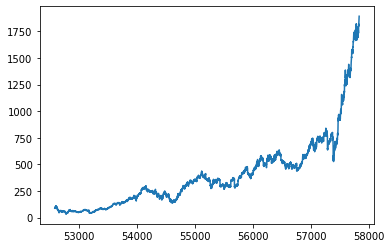

In [29]:
df=df_merged.loc[(df_merged["Symbol"] == "INFY")]
df['Close'].plot()

In [ ]:
def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("It is stationary")
    else:
        print(" it is non-stationary ")

In [ ]:
for company in company_list:
    df=df_merged.loc[(df_merged["Symbol"] == company)]
    test_result=adfuller_test(df['Close'])
    print(company)
    

ADF Test Statistic : -1.0046270625843037
p-value : 0.7515729474808719
#Lags Used : 25
Number of Observations Used : 4787
 it is non-stationary 
AMARAJABAT
ADF Test Statistic : -1.1525164475623906
p-value : 0.6936814264187737
#Lags Used : 4
Number of Observations Used : 4934
 it is non-stationary 
APOLLOTYRE
ADF Test Statistic : 1.2466574946664073
p-value : 0.9962929088651347
#Lags Used : 27
Number of Observations Used : 4716
 it is non-stationary 
BAJAJFINSV
ADF Test Statistic : 2.3711783294164874
p-value : 0.9989960941380881
#Lags Used : 32
Number of Observations Used : 4780
 it is non-stationary 
BERGEPAINT
ADF Test Statistic : -1.448567625138803
p-value : 0.5587836682007519
#Lags Used : 0
Number of Observations Used : 2744
 it is non-stationary 
COALINDIA
ADF Test Statistic : -0.2243868450883818
p-value : 0.935551652511642
#Lags Used : 30
Number of Observations Used : 4770
 it is non-stationary 
COLPAL
ADF Test Statistic : 1.4364137064760927
p-value : 0.9972734451319308
#Lags Used :

####Autocorrelation function (ACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
df=df_merged.loc[(df_merged["Symbol"] == company)]

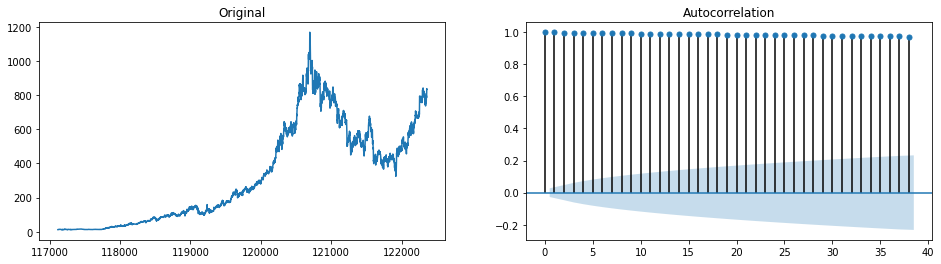

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

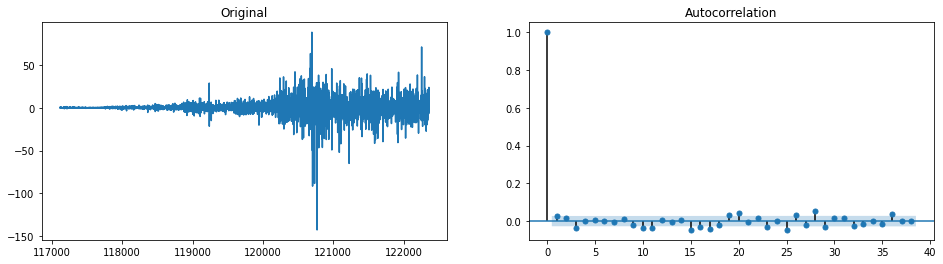

In [ ]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Original")
plot_acf(diff,ax=ax2);

In [ ]:
#pmdarima package to get the number of differencing
pip install pmdarima

     |████████████████████████████████| 1.4 MB 15.5 MB/s 
     |████████████████████████████████| 9.8 MB 25.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
from pmdarima.arima.utils import ndiffs

ModuleNotFoundError: ignored

In [ ]:
ndiffs(df.Close,test="adf")

1

<Figure size 432x288 with 0 Axes>

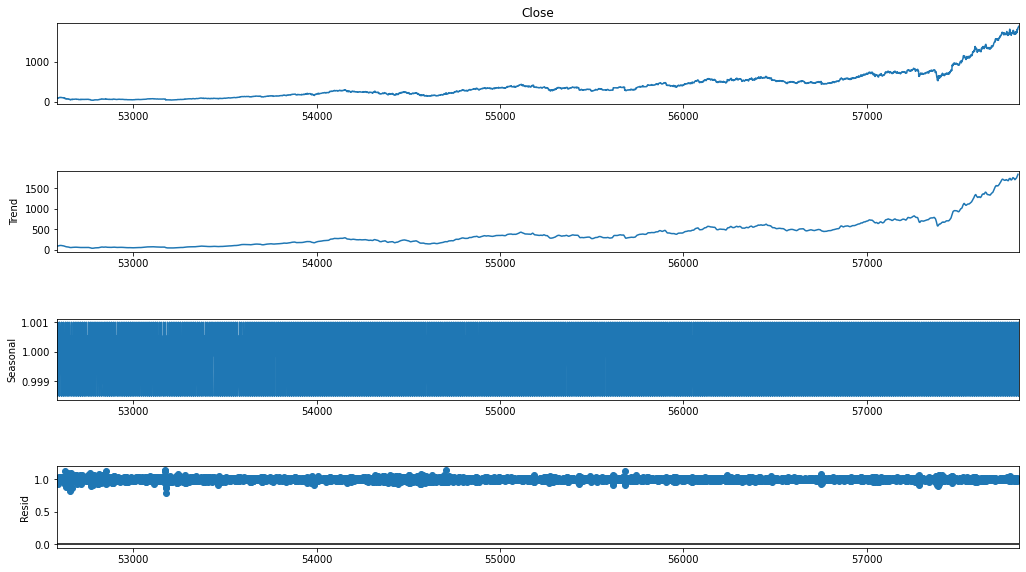

In [ ]:
# we can decompose the series using the following code.
result = seasonal_decompose(df, model='multiplicative',period=10)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

####Partial Autocorelation (PACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


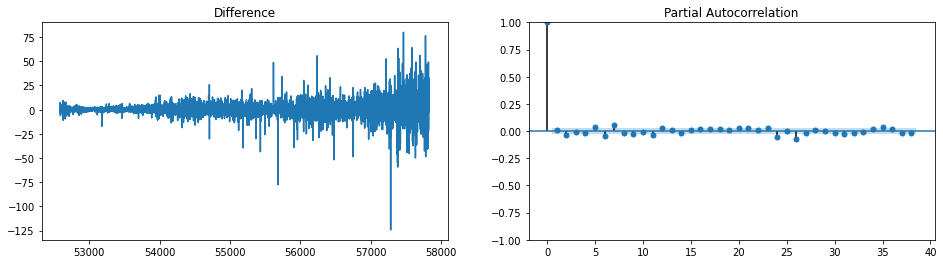

In [ ]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [30]:
df=df["Close"]

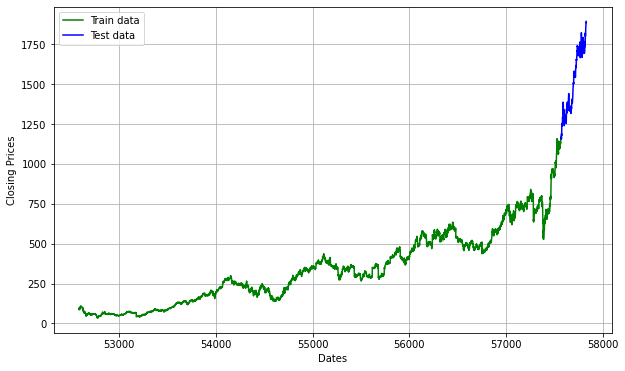

In [31]:
#split data into train and training set
training_size=int(len(df)*0.95)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size],df[training_size:len(df)]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [32]:
test_data

57570    1164.550049
57571    1154.599976
57572    1165.699951
57573    1159.199951
57574    1189.800049
            ...     
57825    1863.500000
57826    1866.150024
57827    1888.000000
57828    1885.550049
57829    1892.849976
Name: Close, Length: 260, dtype: float64

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
import pmdarima 

ImportError: ignored

In [33]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33906.777, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33903.226, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33903.132, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33908.891, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33904.823, Time=1.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=33904.832, Time=1.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33906.831, Time=1.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=33905.544, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 6.510 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4927
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -16948.566
Date:                Wed, 13 Apr 2022   AIC                          33903.132
Time:                       

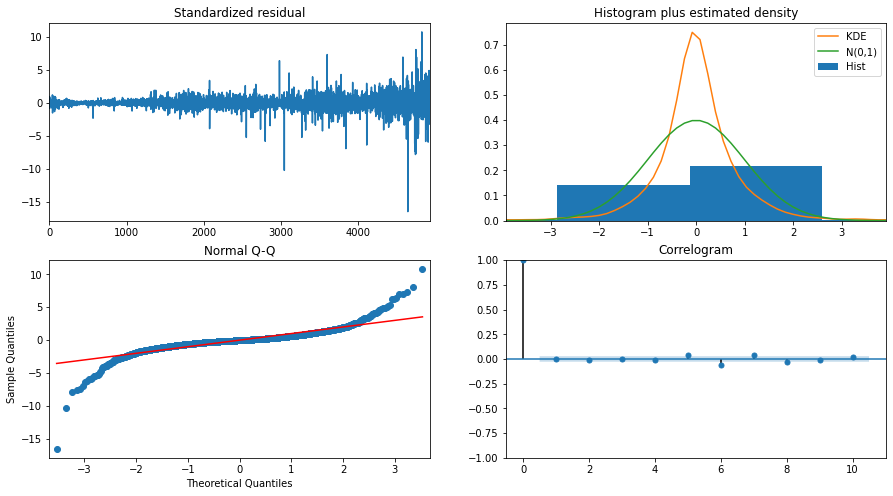

In [36]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [37]:
prediction, confint =model_autoARIMA.predict(n_periods=test_size, return_conf_int=True)
prediction

array([1163.58904437, 1163.80732319, 1164.02560202, 1164.24388085,
       1164.46215967, 1164.6804385 , 1164.89871733, 1165.11699616,
       1165.33527498, 1165.55355381, 1165.77183264, 1165.99011147,
       1166.20839029, 1166.42666912, 1166.64494795, 1166.86322677,
       1167.0815056 , 1167.29978443, 1167.51806326, 1167.73634208,
       1167.95462091, 1168.17289974, 1168.39117856, 1168.60945739,
       1168.82773622, 1169.04601505, 1169.26429387, 1169.4825727 ,
       1169.70085153, 1169.91913036, 1170.13740918, 1170.35568801,
       1170.57396684, 1170.79224566, 1171.01052449, 1171.22880332,
       1171.44708215, 1171.66536097, 1171.8836398 , 1172.10191863,
       1172.32019745, 1172.53847628, 1172.75675511, 1172.97503394,
       1173.19331276, 1173.41159159, 1173.62987042, 1173.84814925,
       1174.06642807, 1174.2847069 , 1174.50298573, 1174.72126455,
       1174.93954338, 1175.15782221, 1175.37610104, 1175.59437986,
       1175.81265869, 1176.03093752, 1176.24921635, 1176.46749

In [ ]:
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4927
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -16950.654
Date:                Wed, 06 Apr 2022   AIC                          33909.309
Time:                        14:10:24   BIC                          33935.318
Sample:                             0   HQIC                         33918.432
                               - 4927                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0165      1.307     -0.013      0.990      -2.579       2.546
ma.L1         -0.0164      1.307     -0.013      0.990      -2.579       2.546
ma.L2         -0.0075      0.044     -0.172      0.8

In [39]:
import math

In [42]:
# report performance
mse = mean_squared_error(test_data, prediction)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, prediction)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, prediction))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
print("(R^2) Score:", round(r2_score(test_data, prediction), 4))

MSE: 138561.77819963102
MAE: 326.05770948447116
RMSE: 372.23887249940867
MAPE: 0.20291054908743617
(R^2) Score: -2.6303


In [44]:
    print("Mean Absolute Error:", round(mean_absolute_error(test_data, prediction), 4))
    print("Mean Squared Error:", round(mean_squared_error(test_data, prediction), 4))
    print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(test_data, prediction)), 4))
    print("(R^2) Score:", round(r2_score(test_data, prediction), 4))
    errors = abs(prediction-test_data)
    mape = 100 * (errors / test_data)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 326.0577
Mean Squared Error: 138561.7782
Root Mean Squared Error: 372.2389
(R^2) Score: -2.6303
Accuracy: 79.71 %.


In [ ]:
#arima model for 25 companies
company_list=df_merged.Symbol.unique()

In [1]:
for company in company_list:
    df=df_merged.loc[(df_merged["Symbol"] == company)]
    df=df["Close"]
    print(company)
    test_result=adfuller_test(df)
    

    training_size=int(len(df)*0.95)
    test_size=len(df)-training_size
    train_data,test_data=df[0:training_size],df[training_size:len(df)]
    model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    prediction =model_autoARIMA.predict(n_periods=test_size)
    
    mse = mean_squared_error(test_data, prediction)
    print('MSE: '+str(mse))
    mae = mean_absolute_error(test_data, prediction)
    print('MAE: '+str(mae))
    rmse = math.sqrt(mean_squared_error(test_data, prediction))
    print('RMSE: '+str(rmse))
    mape = np.mean(np.abs(prediction - test_data)/np.abs(test_data))
    print('MAPE: '+str(mape))
    print("(R^2) Score:", round(r2_score(ytest, test_predict), 4))

   

NameError: ignored

### Long Short Term Memory (LSTM)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()
d={}

symbol=[]
dfp = pd.DataFrame(columns = ['Symbol','Date','Predicted closing price'])
df4=pd.DataFrame()
df5=pd.DataFrame()
for company in company_list:
    df=df_merged.loc[(df_merged["Symbol"] == company)]
    df=df.reset_index()['Close']
    scaler=MinMaxScaler(feature_range=(0,1))
    df1=scaler.fit_transform(np.array(df).reshape(-1,1))
    training_size=int(len(df1)*0.9)
    test_size=len(df1)-training_size
    train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
    import numpy
# convert an array of values into a dataset matrix
    def create_dataset(dataset, time_step=1):
	    dataX, dataY = [], []
	    for i in range(len(dataset)-time_step-1):
		    a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		    dataX.append(a)
		    dataY.append(dataset[i + time_step, 0])
	    return numpy.array(dataX), numpy.array(dataY)
    time_step = 150
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1,batch_size=64,verbose=1)
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    
    print(company)
    print("Mean Absolute Error:", round(mean_absolute_error(ytest, test_predict), 4))
    print("Mean Squared Error:", round(mean_squared_error(ytest, test_predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(ytest, test_predict)), 4))
    print("(R^2) Score:", round(r2_score(ytest, test_predict), 4))
    errors = abs(test_predict - ytest)
    mape = 100 * (errors / ytest)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.') 
    
    
    from numpy import array
    x=len(test_data)-150
    x_input=test_data[x:].reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    date=[]
    n_steps=150
    i=0
    dat=df_merged.iloc[-1, 1]
    while(i<5):
      newdate = dat + datetime.timedelta(days=i+1)
      date.append(newdate)
      if(len(temp_input)>150):
        
          x_input=np.array(temp_input[1:])
       
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
        
          yhat = model.predict(x_input, verbose=0)
        
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
        
          lst_output.extend(yhat.tolist())
          symbol.append(company)
          i=i+1
          
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          print(yhat[0])
          temp_input.extend(yhat[0].tolist())
          print(len(temp_input))
          lst_output.extend(yhat.tolist())
          symbol.append(company)
          i=i+1
         
    


    lst_output=scaler.inverse_transform(lst_output)
    print(lst_output)
    df3= pd. DataFrame(lst_output, columns=['predicted value'])
    df_d= pd.DataFrame(date, columns=['Date'])
    df4=df4.append(df3, ignore_index = True)
    df5=df5.append(df_d, ignore_index = True)
df2= pd. DataFrame(symbol, columns=['symbol'])
dfp=pd.concat([df2,df5,df4], ignore_index=True,axis=1)
    
    
 



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 150, 100)          40800     
                                                                 
 lstm_13 (LSTM)              (None, 150, 100)          80400     
                                                                 
 lstm_14 (LSTM)              (None, 150, 50)           30200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________
66/66 [==============================] - 45s 494

In [ ]:
import matplotlib.pyplot as plt

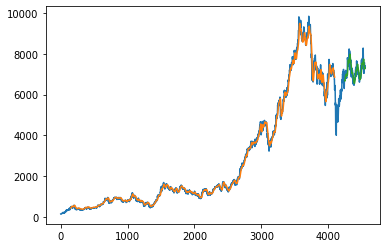

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()